<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None
       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75

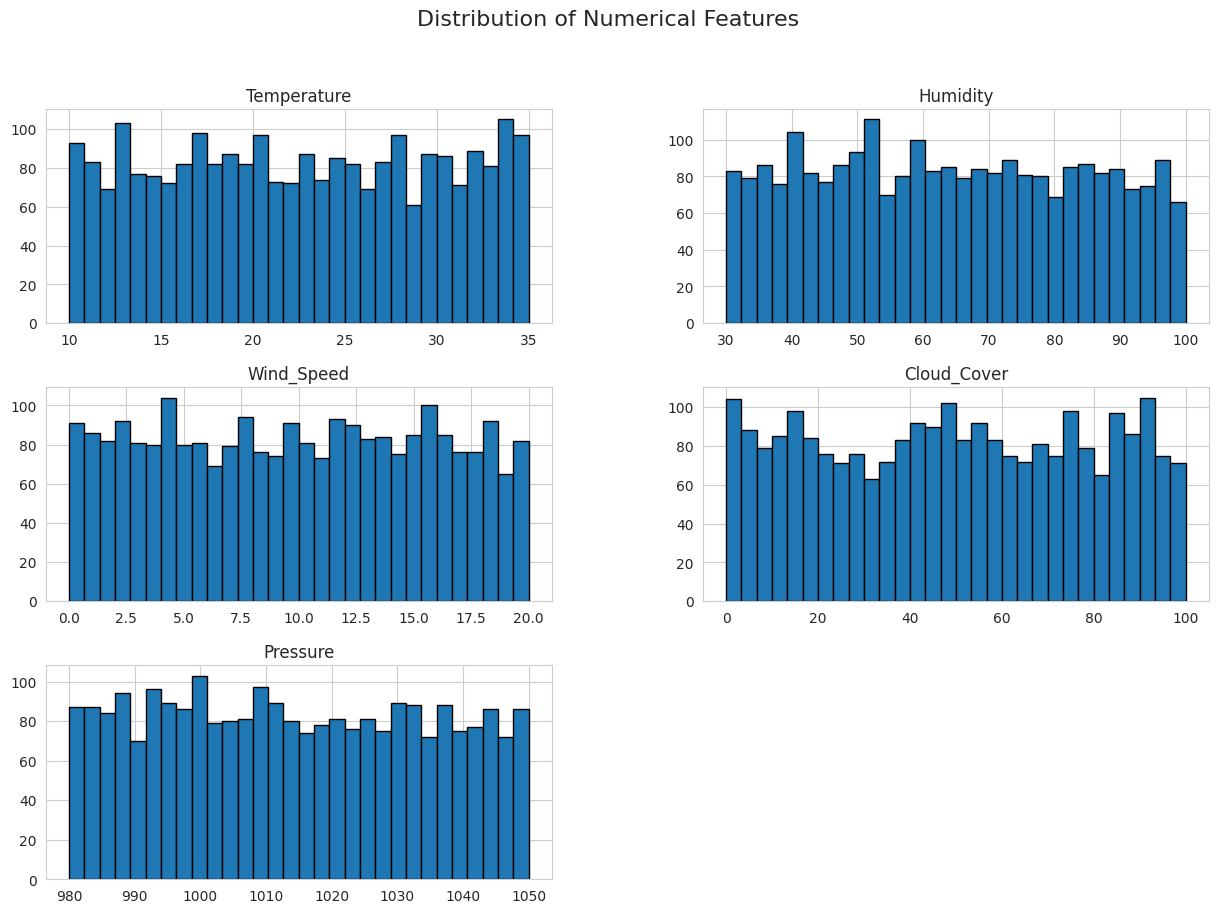

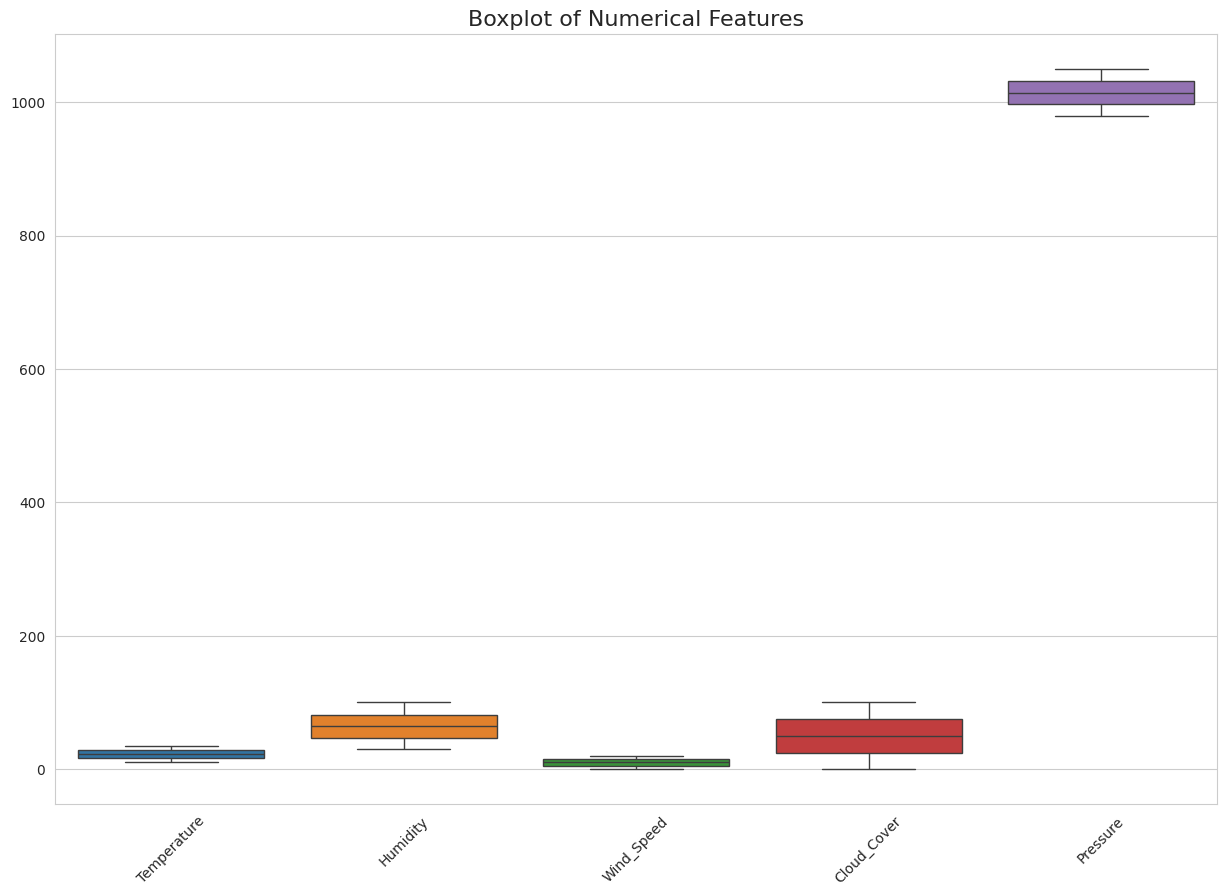

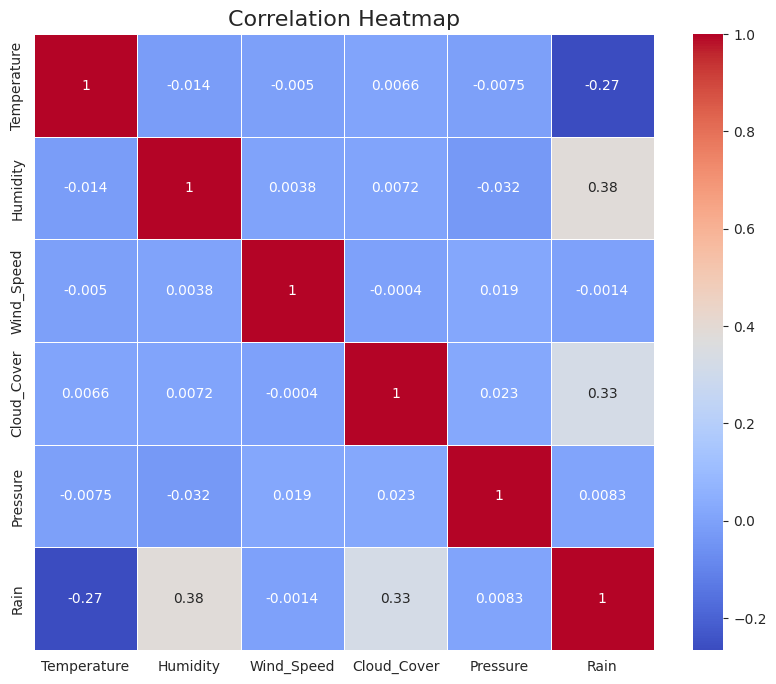

<ipython-input-4-23fd8cf28ddf>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rain', data=df, palette="viridis")


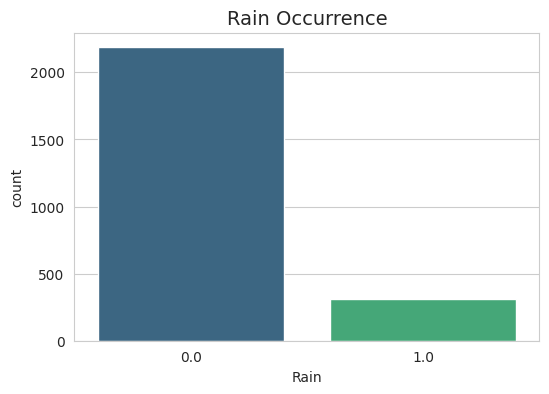

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI./weather_forecast_data.csv')

# Initial analysis
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Visualizations
# Set a visual style
sns.set_style("whitegrid")

# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10), edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Boxplots for numerical features to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
# Convert 'Rain' column to numerical (assuming 'rain' represents 1 and other values represent 0)
df['Rain'] = df['Rain'].map({'rain': 1, 'no rain':0}).astype(float) #added line to convert the rain column to numbers

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Count plot for 'Rain' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Rain', data=df, palette="viridis")
plt.title("Rain Occurrence", fontsize=14)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Assume 'Rain' is the target column with values like 'rain' or 'no rain'
X = df.drop('Rain', axis=1)
# Check the unique values of the 'Rain' column in the original DataFrame
print(df['Rain'].unique())

# Ensure 'Rain' column has been converted to numerical (0 and 1) before applying lambda function
y = df['Rain']  # Access the 'Rain' column which should already be numerical (0 and 1)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Check the unique values in y_train to confirm it has both classes
print(y_train.unique())


# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Task 2: Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])

# Train logistic regression from scratch
lr_scratch = LogisticRegressionScratch(learning_rate=0.01, n_iterations=1000)
lr_scratch.fit(X_train, y_train)

# Predictions
y_train_pred_scratch = lr_scratch.predict(X_train)
y_test_pred_scratch = lr_scratch.predict(X_test)

# Evaluation Metrics for Scratch Model
print("=== Logistic Regression (Scratch) ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_scratch)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_scratch)}")
print(f"Train Precision: {precision_score(y_train, y_train_pred_scratch)}")
print(f"Test Precision: {precision_score(y_test, y_test_pred_scratch)}")
print(f"Train Recall: {recall_score(y_train, y_train_pred_scratch)}")
print(f"Test Recall: {recall_score(y_test, y_test_pred_scratch)}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_scratch)}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_scratch)}")

### Task 3: Model Comparisons
# Logistic Regression (Built-in)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation and Comparison
print("\n=== Logistic Regression (Built-in) ===")
print(classification_report(y_test, y_pred_lr))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

# Model Comparison
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\n=== Model Comparison ===")
if accuracy_rf > accuracy_lr:
    print("Random Forest performed better with higher accuracy.")
else:
    print("Logistic Regression performed better with higher accuracy.")


[1. 0.]
[0. 1.]
=== Logistic Regression (Scratch) ===
Train Accuracy: 0.912
Test Accuracy: 0.92
Train Precision: 0.9655172413793104
Test Precision: 0.8695652173913043
Train Recall: 0.32684824902723736
Test Recall: 0.3508771929824561
Train F1 Score: 0.4883720930232558
Test F1 Score: 0.5

=== Logistic Regression (Built-in) ===
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       443
         1.0       0.73      0.63      0.68        57

    accuracy                           0.93       500
   macro avg       0.84      0.80      0.82       500
weighted avg       0.93      0.93      0.93       500


=== Random Forest ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       443
         1.0       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       5

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],    # Regularization strength
    'penalty': ['l1', 'l2']      # Regularization type (L1 = Lasso, L2 = Ridge)
}

# Using GridSearchCV to find the best parameters
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

# Best parameters for Logistic Regression
best_params_lr = grid_lr.best_params_
print("Best parameters for Logistic Regression:", best_params_lr)

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the trees
}

# Using GridSearchCV to find the best parameters
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Best parameters for Random Forest
best_params_rf = grid_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# Train models with best hyperparameters
best_lr_model = LogisticRegression(**best_params_lr, solver='liblinear')
best_lr_model.fit(X_train, y_train)

best_rf_model = RandomForestClassifier(**best_params_rf)
best_rf_model.fit(X_train, y_train)

# Predictions on test set
y_pred_best_lr = best_lr_model.predict(X_test)
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the optimized models
from sklearn.metrics import classification_report

print("\n=== Optimized Logistic Regression ===")
print(classification_report(y_test, y_pred_best_lr))

print("\n=== Optimized Random Forest ===")
print(classification_report(y_test, y_pred_best_rf))


Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1'}
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}

=== Optimized Logistic Regression ===
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       443
         1.0       0.72      0.60      0.65        57

    accuracy                           0.93       500
   macro avg       0.84      0.78      0.81       500
weighted avg       0.92      0.93      0.92       500


=== Optimized Random Forest ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       443
         1.0       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 3 features using ANOVA F-test
selector = SelectKBest(f_classif, k=3)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Temperature', 'Humidity', 'Cloud_Cover'], dtype='object')


In [ ]:
# Logistic Regression
final_lr_model = LogisticRegression(C=1, penalty='l2')
# Convert selected_features to a list to index the NumPy array
final_lr_model.fit(X_train[:, selected_features.get_indexer(selected_features)], y_train)
y_pred_lr_final = final_lr_model.predict(X_test[:, selected_features.get_indexer(selected_features)])

# Random Forest
final_rf_model = RandomForestClassifier(n_estimators=200, max_depth=None)
# Convert selected_features to a list to index the NumPy array
final_rf_model.fit(X_train[:, selected_features.get_indexer(selected_features)], y_train)
y_pred_rf_final = final_rf_model.predict(X_test[:, selected_features.get_indexer(selected_features)])

In [ ]:
# Logistic Regression
print("Final Logistic Regression:")
print(classification_report(y_test, y_pred_lr_final))

# Random Forest
print("Final Random Forest:")
print(classification_report(y_test, y_pred_rf_final))

Final Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       443
         1.0       0.47      0.30      0.37        57

    accuracy                           0.88       500
   macro avg       0.69      0.63      0.65       500
weighted avg       0.86      0.88      0.87       500

Final Random Forest:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       443
         1.0       0.46      0.51      0.48        57

    accuracy                           0.88       500
   macro avg       0.70      0.72      0.71       500
weighted avg       0.88      0.88      0.88       500

